## Imports

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import data.data_selector as ds
import utils.data_processing as dp
import utils.plot_functions as pf
import analysis.analysis_picker as ap

In [3]:
analysis_params = {
  #"model_type": "ica",
  "model_type": "lca",
  #"model_type": "sparse_autoencoder",
  #"model_type": "gdn_autoencoder",
  #"model_name": "ica",
  "model_name": "lca_256_l0_2.5",
  #"model_name": "lca_vh_ft_1c",
  #"model_name": "lca_vh_ft_1c_ht",
  #"model_name": "lca_vh_ft_white",
  #"model_name": "lca_vh_ft_64d_96n",
  #"model_name": "sparse_autoencoder",
  #"model_name": "gdn_autoencoder",
  #"version": "0.0",
  "version": "1.0",
  #"version": "2.0",
  #"version": "3.0",
  #"save_info": "full_imgs",
  "save_info": "analysis",
  "overwrite_analysis": False}

# Computed params
#analysis_params["model_dir"] = (os.path.expanduser("~")+"/Work/Projects/nowht_v3/"+analysis_params["model_name"]+"_v"+analysis_params["version"])
analysis_params["model_dir"] = (os.path.expanduser("~")+"/Work/Projects/"+analysis_params["model_name"])

In [4]:
analyzer = ap.get_analyzer(analysis_params)
analyzer.model.setup(analyzer.model_params, analyzer.model_schedule)
analyzer.load_analysis(save_info=analysis_params["save_info"])

ot_bf_indices = analyzer.ot_grating_responses["neuron_indices"]
ot_contrasts = analyzer.ot_grating_responses["contrasts"]
ot_phases = analyzer.ot_grating_responses["phases"]
ot_orientations = analyzer.ot_grating_responses["orientations"]
ot_best_phases = analyzer.ot_grating_responses["best_phases"]
ot_mean_activations = analyzer.ot_grating_responses["mean_responses"]

co_bf_indices = analyzer.co_grating_responses["neuron_indices"]
co_contrasts = analyzer.co_grating_responses["contrasts"]
co_phases = analyzer.co_grating_responses["phases"]
co_base_orientations = analyzer.co_grating_responses["base_orientations"]
co_mask_orientations = analyzer.co_grating_responses["mask_orientations"]
co_base_mean_responses = analyzer.co_grating_responses["base_mean_responses"]
co_test_mean_responses = analyzer.co_grating_responses["test_mean_responses"]

In [5]:
outputs = analyzer.iso_response_contrasts(analyzer.bf_stats, base_contrast=0.5, contrast_resolution=0.01,
  closeness=0.05, num_alt_orientations=4, orientations=np.linspace(0.0, np.pi, 32),
  phases = np.linspace(-np.pi, np.pi, 12), neuron_indices=[0,1,2], diameter=-1,
  scale=analyzer.analysis_params["input_scale"])

INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000
INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000
INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000
INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000
INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000
INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v

In [9]:
outputs["iso_response_parameters"][0]

[(0.5, 2.2295173670637243, 1.9991953250116863, 18.38133),
 (0.51, 4.357693035624552, 0.2855993321445265, 2.9923456),
 (0.51, 4.357693035624552, 0.2855993321445265, 2.9923456)]

### GDN Analysis

In [5]:
#import data.data_selector as ds
#analyzer.model_params["data_type"] = analysis_params["data_type"]
#data = ds.get_data(analyzer.model_params)
#data = analyzer.model.preprocess_dataset(data)
#data = analyzer.model.reshape_dataset(data, analyzer.model_params)
#analyzer.model_params["data_shape"] = [                                                       
#  data["train"].num_rows*data["train"].num_cols*data["train"].num_channels]     

In [6]:
#print(data["train"].images.shape)

In [7]:
#gdn_weights = analyzer.evals['weights/igdn_w:0']
#fig, ax = plt.subplots(1, 1, figsize=(10,10))
#im = ax.imshow(gdn_weights, vmin=np.min(gdn_weights), vmax=np.max(gdn_weights), cmap="Greys_r")
#ax.set_title("Inverse GDN weights")
#pf.clear_axis(ax)
#pf.add_colorbar_to_im(im, aspect=50)
#plt.show()

In [8]:
#gdn_weights = analyzer.evals['weights/gdn_w:0']
#fig, ax = plt.subplots(1, 1, figsize=(10,10))
#im = ax.imshow(gdn_weights, vmin=np.min(gdn_weights), vmax=np.max(gdn_weights), cmap="Greys_r")
#ax.set_title("GDN weights")
#pf.clear_axis(ax)
#pf.add_colorbar_to_im(im, aspect=50)
#plt.show()

### BF Analysis & Iso-Response Contours

In [9]:
num_pixels = analyzer.model_params["patch_edge_size"]**2
neuron_angles = np.zeros((analyzer.bf_stats["num_outputs"], analyzer.bf_stats["num_outputs"]))
for neuron1 in range(analyzer.bf_stats["num_outputs"]):
  #for neuron2 in range(0,neuron1):
  #  neuron_angles[neuron1, neuron2] = None
  #for neuron2 in range(neuron1, analyzer.bf_stats["num_outputs"]):
  for neuron2 in range(analyzer.bf_stats["num_outputs"]):
    bf1 = analyzer.bf_stats["basis_functions"][neuron1].reshape((num_pixels,1))
    bf2 = analyzer.bf_stats["basis_functions"][neuron2].reshape((num_pixels,1))
    inner_products = np.dot((bf1/np.linalg.norm(bf1)).T, bf2/np.linalg.norm(bf2))
    inner_products[inner_products>1.0] = 1.0
    inner_products[inner_products<-1.0] = -1.0
    angle = np.arccos(inner_products)
    neuron_angles[neuron1, neuron2] = angle

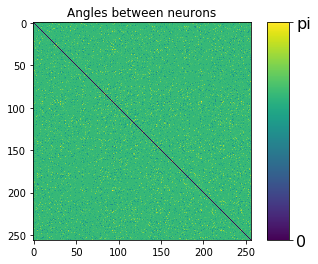

In [10]:
cmap = plt.get_cmap('viridis')
vmin = 0
vmax = np.pi
cNorm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)
scalarMap._A = []
plt.show()
fig, ax = plt.subplots(1)
im = ax.imshow(neuron_angles)
ax.set_title("Angles between neurons")
cbar = fig.colorbar(scalarMap, ax=ax, ticks=[vmin, vmax], aspect=10)
cbar.ax.set_yticklabels(["0","pi"])
cbar.ax.tick_params(labelsize=16)
plt.show()

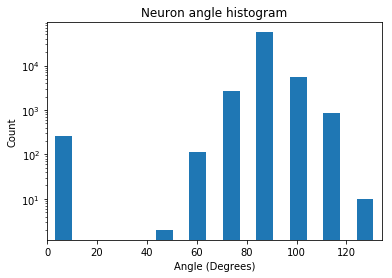

In [11]:
angles = neuron_angles[np.isfinite(neuron_angles)].flatten()*(180/np.pi)
xlims = [0, np.max(angles)]
fig, ax = plt.subplots(1)
ax.hist(angles, rwidth=0.5, log=True)
ax.set_xlim(xlims)
ax.set_title("Neuron angle histogram")
ax.set_xlabel("Angle (Degrees)")
ax.set_ylabel("Count")
plt.show()

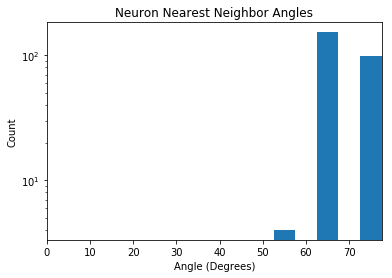

In [12]:
nn_angles = np.zeros(analyzer.bf_stats["num_outputs"])
for neuron_id in range(analyzer.bf_stats["num_outputs"]): 
  neighbors = neuron_angles[neuron_id,:] * (180/np.pi)
  nn_angles[neuron_id] = np.min(np.delete(neighbors, neuron_id))
fig, ax = plt.subplots(1)
ax.hist(nn_angles.flatten(), rwidth=0.5, bins=np.linspace(0,90,10), log=True)
ax.set_xlim([0, np.max(nn_angles)])
ax.set_title("Neuron Nearest Neighbor Angles")
ax.set_xlabel("Angle (Degrees)")
ax.set_ylabel("Count")
plt.show()

num vectors =  1146
min angle =  0.9054139256477356  rad
min angle is at index  419
vector angle	=  1.2209630012512207  rad
		=  69.9560269133212  deg
bf1 norm =  0.99999994
bf2 norm =  1.0


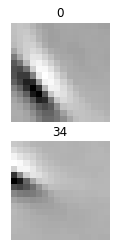

In [13]:
min_angle = 0.01
max_angle = 1.3
#min_angle = 1.55
#max_angle = 1.59

vectors = np.argwhere(np.logical_and(neuron_angles<max_angle, neuron_angles>min_angle))
print("num vectors = ", vectors.shape[0])

if vectors.shape[0] > 0:
  print("min angle = ", np.min(neuron_angles[vectors[:,0], vectors[:,1]]), " rad")
  print("min angle is at index ", np.argmin(neuron_angles[vectors[:,0], vectors[:,1]]))

  vector_id = 2#404
  bf_id1 = vectors[vector_id, 0]#max_indices[0]
  bf_id2 = vectors[vector_id, 1]#max_indices[1]

  fig, ax = plt.subplots(2)
  ax[0] = pf.clear_axis(ax[0])
  ax[0].imshow(analyzer.bf_stats["basis_functions"][bf_id1], cmap="Greys_r")
  ax[0].set_title(str(bf_id1))
  ax[1] = pf.clear_axis(ax[1])
  ax[1].imshow(analyzer.bf_stats["basis_functions"][bf_id2], cmap="Greys_r")
  ax[1].set_title(str(bf_id2))

  print("vector angle\t= ", neuron_angles[bf_id1, bf_id2], " rad\n\t\t= ", neuron_angles[bf_id1, bf_id2]*(180/np.pi), " deg")
  bf1 = analyzer.bf_stats["basis_functions"][bf_id1].reshape((num_pixels))
  bf2 = analyzer.bf_stats["basis_functions"][bf_id2].reshape((num_pixels))
  bf1_norm = np.linalg.norm(bf1)
  bf2_norm = np.linalg.norm(bf2)
  print("bf1 norm = ", bf1_norm)
  print("bf2 norm = ", bf2_norm)
  bf1 /= bf1_norm
  bf2 /= bf2_norm

In [14]:
# need to find two orthogonal vectors that have the same span as these two bfs
v = bf2 - np.dot(bf2[:,None].T, bf1[:,None]) * bf1
v = np.squeeze((v / np.linalg.norm(v)).T)
proj_matrix = np.stack([bf1,v], axis=0)
proj_neuron1 = np.dot(proj_matrix, bf1)
proj_neuron2 = np.dot(proj_matrix, bf2)
print(proj_neuron1)
print(proj_neuron2)
print(np.linalg.norm(proj_neuron2))

[ 1.0000001e+00 -4.8428774e-08]
[0.34274125 0.9394297 ]
0.9999999


In [15]:
num_imgs = 10000
y_pts = np.linspace(-2.0, 2.0, int(np.sqrt(num_imgs)))
x_pts = np.linspace(-2.0, 2.0, int(np.sqrt(num_imgs)))
X,Y = np.meshgrid(x_pts, y_pts)
proj_datapoints = np.stack([Y.reshape(num_imgs), X.reshape(num_imgs)], axis=1)
datapoints = np.stack([np.dot(proj_matrix.T, proj_datapoints[data_id,:]) for data_id in range(num_imgs)]) #inject

In [16]:
#plt.imshow(datapoints[-12,:].reshape(16,16), cmap="Greys_r")
#plt.show()

In [17]:
var_names = ["inference/activity:0"]
activations = analyzer.evaluate_model(100*datapoints, var_names)["inference/activity:0"]

#var_names = ["inference/gdn_output:0"]
#activations = analyzer.evaluate_model(datapoints, var_names)["inference/gdn_output:0"]

#var_names = ["inference/coefficients:0"]
#activations = analyzer.evaluate_model(datapoints, var_names)["inference/coefficients:0"]

activity_max = np.max(np.abs(activations))
norm_activity = activations / (activity_max+0.0001)

INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000


INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000
num nonzero for bf1:  45
num nonzero for bf2:  42


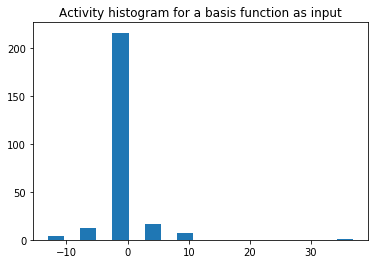

In [18]:
test_datapoints = 100*np.squeeze(np.stack([bf1, bf2]))
test_activations = analyzer.evaluate_model(test_datapoints, var_names)["inference/activity:0"]
print("num nonzero for bf1: ", np.count_nonzero(test_activations[0,:]))
print("num nonzero for bf2: ", np.count_nonzero(test_activations[1,:]))
fig, ax = plt.subplots(1)
ax.hist(test_activations[1,:], rwidth=0.5)
ax.set_title("Activity histogram for a basis function as input")
plt.show()

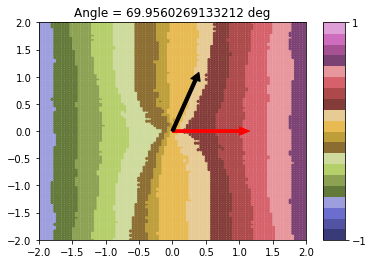

In [19]:
neuron_idx = bf_id1
fig, ax = plt.subplots(1)
cmap = plt.get_cmap('tab20b')
#cmap = plt.get_cmap('viridis')
#cmap = plt.get_cmap('jet')
vmin = np.floor(np.min(norm_activity))#0.0
vmax = np.ceil(np.max(norm_activity))#1.0
cNorm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)
rank_indices = np.argsort(norm_activity[:,neuron_idx])
colors = [scalarMap.to_rgba(norm_activity[data_id, neuron_idx]) for data_id in rank_indices]
ax.scatter(proj_datapoints[:,0][rank_indices], proj_datapoints[:,1][rank_indices], c=colors, s=5.0)
#ax.contour(Y, X, norm_activity[:,neuron_idx].reshape(100,100), linewidths=3)
ax.arrow(0, 0, proj_neuron1[0].item(), proj_neuron1[1].item(), width=0.05, head_width=0.15, head_length=0.15, fc='r', ec='r')
ax.arrow(0, 0, proj_neuron2[0].item(), proj_neuron2[1].item(), width=0.05, head_width=0.15, head_length=0.15, fc='k', ec='k')
ax.set_title("Angle = "+str(neuron_angles[bf_id1, bf_id2]*(180/np.pi))+" deg")
ax.set_ylim([-2, 2.0])
ax.set_xlim([-2, 2.0])
scalarMap._A = []
cbar = fig.colorbar(scalarMap, ax=ax, ticks=[vmin, vmax], aspect=10)
plt.show()

In [21]:
num_imgs = 10**2
line_list = [None,]*(analyzer.bf_stats["num_outputs"]-1)
bf_list = [idx for idx in range(analyzer.bf_stats["num_outputs"]) if idx != neuron_idx]
bf1 = analyzer.bf_stats["basis_functions"][neuron_idx].reshape((num_pixels))
y_pts = [1.5,]*num_imgs#np.linspace(-2.0, 2.0, int(np.sqrt(num_imgs)))
x_pts = np.linspace(-2.0, 2.0, num_imgs)
pop_proj_datapoints = np.stack([y_pts, x_pts], axis=1)
pop_datapoints = []
for line_id in range(analyzer.bf_stats["num_outputs"]-1):
  bf2 = analyzer.bf_stats["basis_functions"][bf_list[line_id]].reshape((num_pixels))
  v = bf2 - np.dot(bf2[:,None].T, bf1[:,None]) * bf1
  v = np.squeeze((v / np.linalg.norm(v)).T)
  proj_matrix = np.stack([bf1,v], axis=0)
  pop_datapoints.append(np.stack([np.dot(proj_matrix.T, pop_proj_datapoints[data_id,:]) for data_id in range(num_imgs)]))
pop_datapoints = np.concatenate(pop_datapoints, axis=0)
var_names = ["inference/activity:0"]
#var_names = ["inference/gdn_output:0"]
pop_activations = analyzer.evaluate_model(pop_datapoints, var_names)[var_names[0]]
pop_activations = pop_activations.reshape([analyzer.bf_stats["num_outputs"]-1, num_imgs, analyzer.bf_stats["num_outputs"]])

INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000


0.0


/home/dpaiton/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


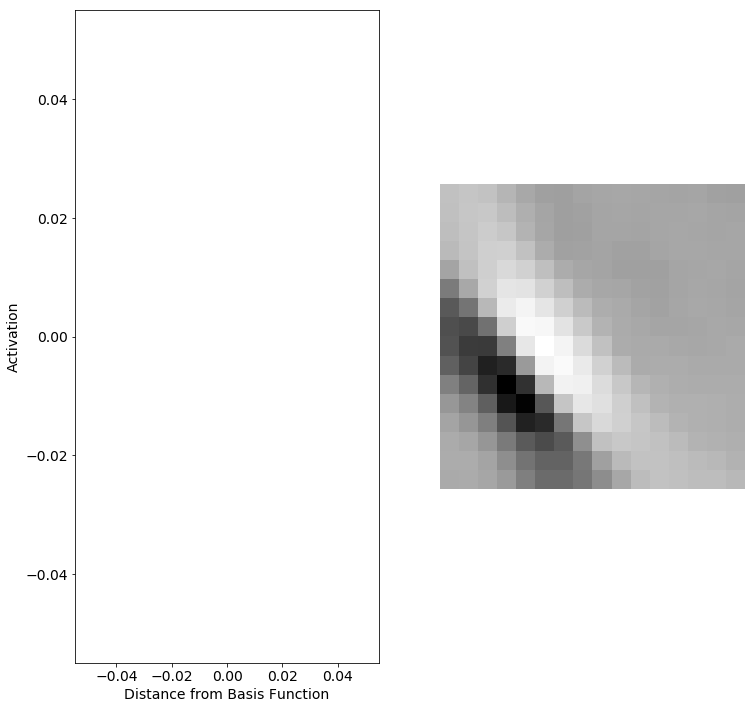

In [22]:
print(np.max(np.abs(pop_activations[:,:,neuron_idx])))
line_list = [pop_activations[idx, :, neuron_idx]/np.max(np.abs(pop_activations[idx, :, neuron_idx]))
  for idx in range(analyzer.bf_stats["num_outputs"]-1)]
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].plot(np.asarray(line_list).T, color='b', alpha=0.3)
#ax[0].set_ylim([0.0,1.1])
ax[0].set_ylabel("Activation", fontsize=14)
ax[0].set_xlabel("Distance from Basis Function", fontsize=14)
#ax[0].set_aspect(100)
ax[0].tick_params(labelsize=14)
ax[1] = pf.clear_axis(ax[1])
ax[1].imshow(analyzer.bf_stats["basis_functions"][neuron_idx], cmap="Greys_r")
plt.show()

Plotting 647 datapoints with responeses within eps = 0.05 of target = 0.2


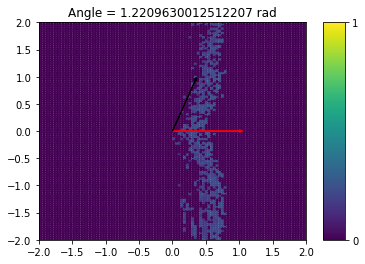

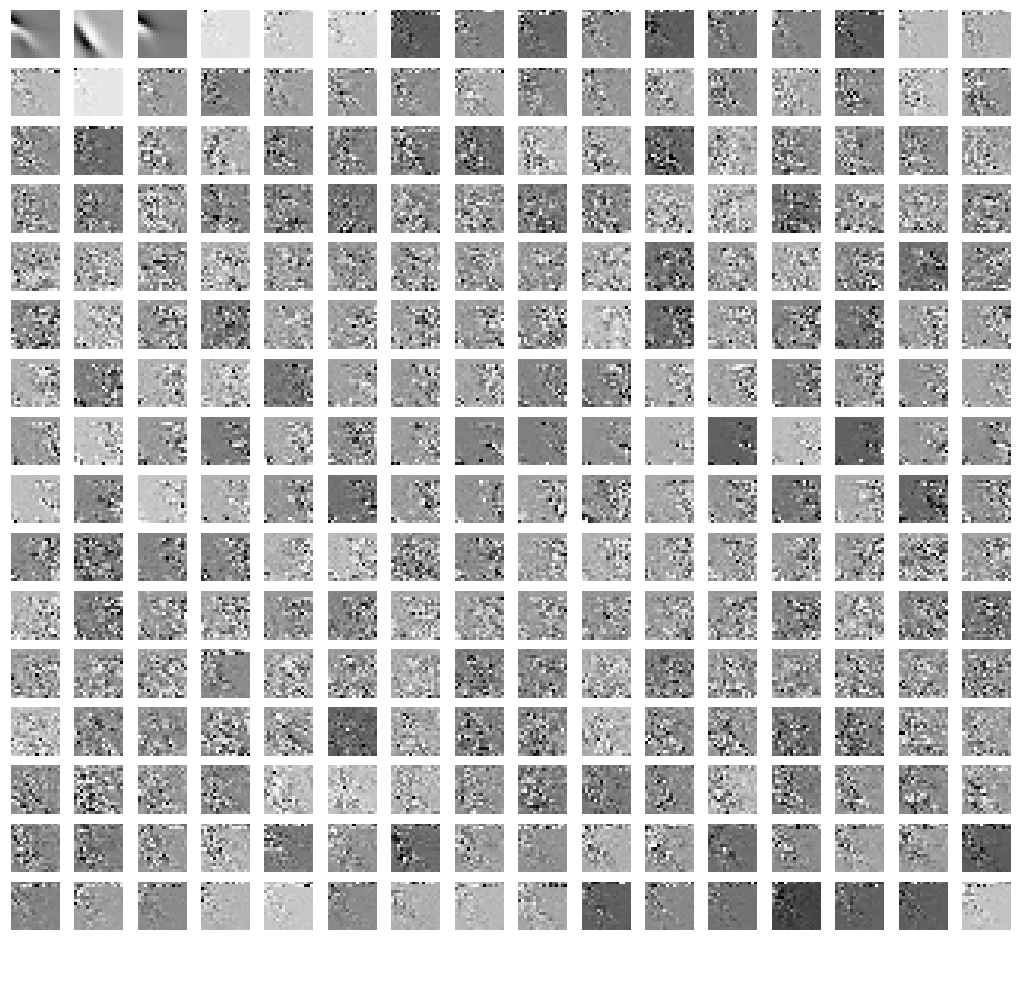

/home/dpaiton/tensorflow/lib/python3.4/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


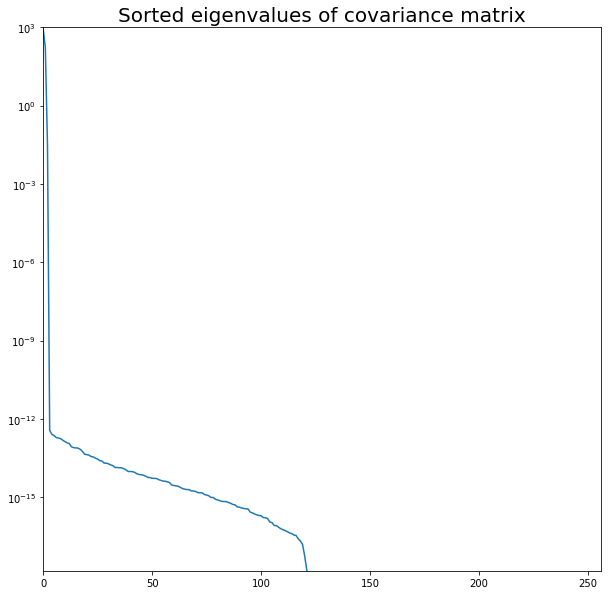

In [23]:
# Find datapoints along one contour
target_activity = 0.2
eps = 0.05
neuron_activity = norm_activity[:, neuron_idx]
iso_activities = neuron_activity[neuron_activity>target_activity-eps]
iso_activities = iso_activities[iso_activities<target_activity+eps]
iso_indices = np.arange(neuron_activity.shape[0])[np.in1d(neuron_activity, iso_activities)]
print("Plotting",len(iso_indices), "datapoints with responeses within eps =",eps,"of target =",target_activity)

fig, ax = plt.subplots(1)
#cmap = plt.get_cmap('tab20b')
cmap = plt.get_cmap('viridis')
#cmap = plt.get_cmap('jet')
vmin = 0.0
vmax = 1.0
cNorm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cmap)
rank_indices = np.argsort(neuron_activity)
colors = [None]*len(rank_indices)
for data_id in rank_indices:
  if data_id in iso_indices:
    colors[data_id] = scalarMap.to_rgba(neuron_activity[data_id])
  else:
    colors[data_id] = scalarMap.to_rgba(0.0)
#colors = [scalarMap.to_rgba(neuron_activity[data_id]) for data_id in rank_indices if data_id in iso_indices]
ax.scatter(proj_datapoints[:,0][rank_indices], proj_datapoints[:,1][rank_indices], c=colors, s=5.0)
ax.arrow(0, 0, proj_neuron1[0].item(), proj_neuron1[1].item(), head_width=0.05, head_length=0.05, fc='r', ec='r')
ax.arrow(0, 0, proj_neuron2[0].item(), proj_neuron2[1].item(), head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.set_title("Angle = "+str(neuron_angles[bf_id1, bf_id2])+" rad")
ax.set_ylim([-2, 2.0])
ax.set_xlim([-2, 2.0])
scalarMap._A = []
cbar = fig.colorbar(scalarMap, ax=ax, ticks=[0, 1], aspect=10)
plt.show()

target_datapoints = datapoints[iso_indices,:] - np.mean(datapoints[iso_indices,:])
iso_cov = np.dot(target_datapoints.T, target_datapoints)
evals, evecs = np.linalg.eigh(iso_cov) 

fig1 = pf.plot_weights(evecs.T.reshape(256, 16, 16)[::-1,...])

fig2 = pf.plot_eigenvalues(evals[::-1])

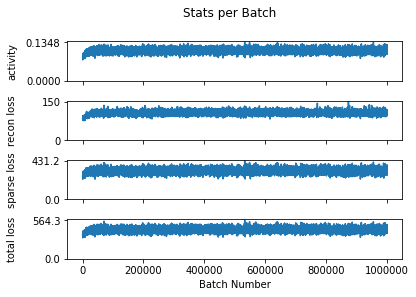

In [25]:
keys=["a_fraction_active", "recon_loss", "sparse_loss", "total_loss"]
labels=["activity", "recon loss", "sparse loss", "total loss"]
#keys=["a_fraction_active", "recon_loss", "entropy_loss", "total_loss"]
#labels=["activity", "recon loss", "entropy loss", "total loss"]
stats_fig = pf.plot_stats(analyzer.run_stats, keys=keys, labels=labels)
stats_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_train_stats.png")

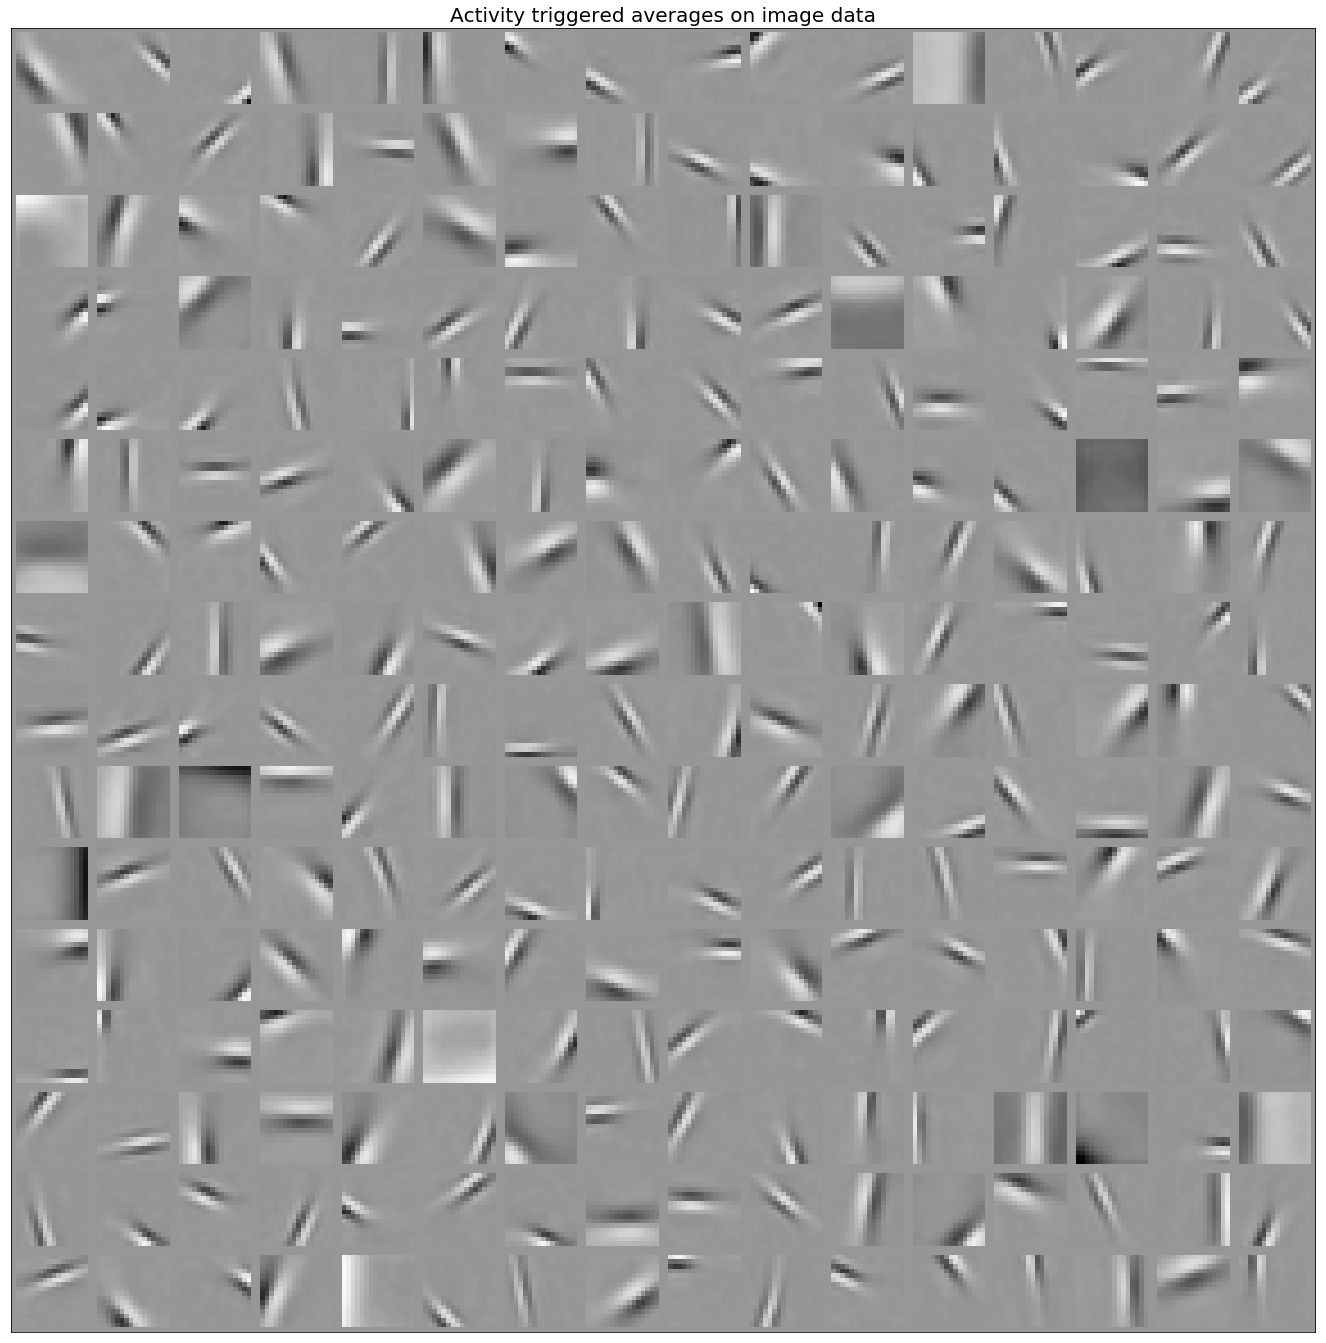

In [26]:
atas_fig = pf.plot_data_tiled(analyzer.atas.T, normalize=False, title="Activity triggered averages on image data")
atas_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_img_atas.png")

In [27]:
#analyzer.cp_loc = "/home/dpaiton/Work/Projects/lca_vh_ft_1c/checkpoints/lca_vh_ft_1c_v0.0_full-100000"

INFO:tensorflow:Restoring parameters from /media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/lca_256_l0_2.5_v1.0/checkpoints/lca_256_l0_2.5_v1.0_v1.0_weights-1000000


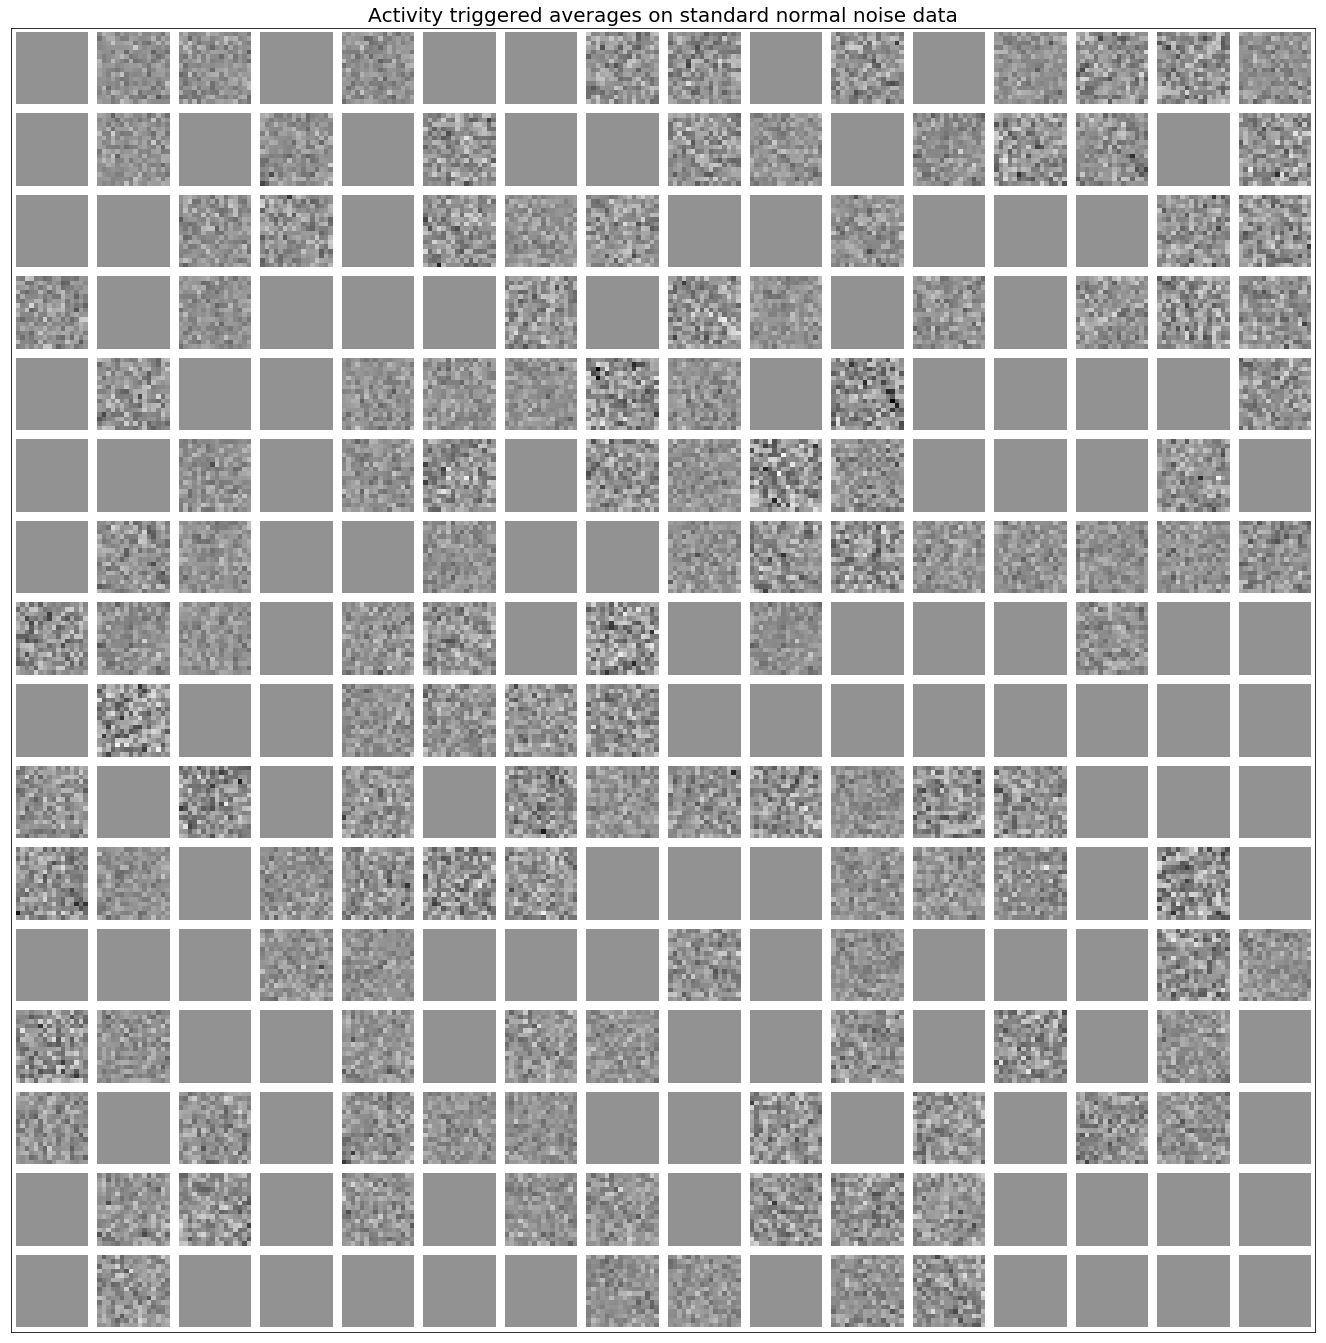

In [28]:
noise_images = np.random.standard_normal([analyzer.model_params["num_images"]]+analyzer.model_params["data_shape"])
noise_evals = analyzer.evaluate_model(noise_images, analyzer.var_names)
noise_atas = analyzer.compute_atas(noise_evals["inference/activity:0"], noise_images)
#noise_atas = analyzer.compute_atas(noise_evals["inference/coefficients:0"], noise_images)
noise_atas_fig = pf.plot_data_tiled(noise_atas.T, normalize=False, title="Activity triggered averages on standard normal noise data")
noise_atas_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_noise_atas.png")

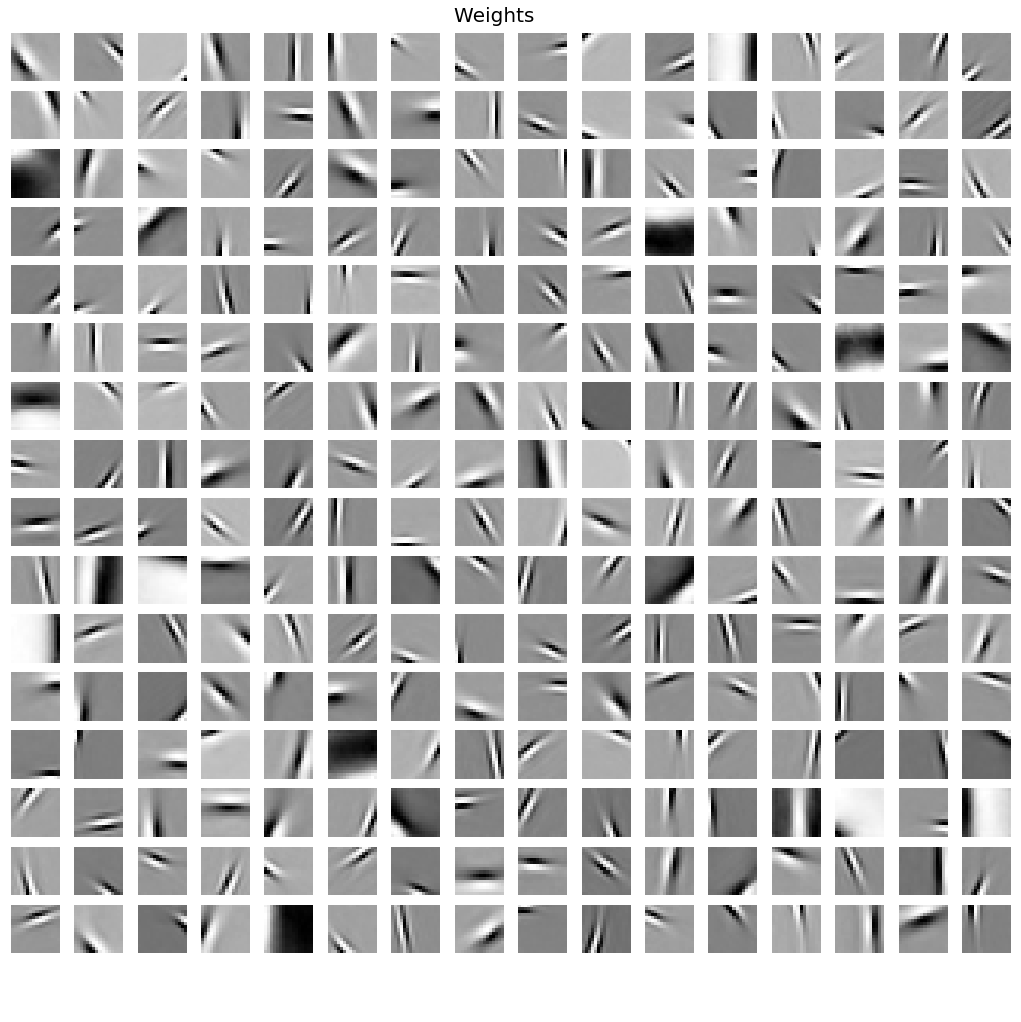

In [29]:
#dict_fig = pf.plot_data_tiled(analyzer.evals["weights/phi:0"].T, normalize=False, title="Weights")
weight_shape = [analyzer.bf_stats["num_outputs"], analyzer.bf_stats["patch_edge_size"], analyzer.bf_stats["patch_edge_size"]]
dict_fig = pf.plot_weights(analyzer.evals["weights/phi:0"].T.reshape(weight_shape), title="Weights")
#dict_fig = pf.plot_weights(analyzer.evals["weights/a_inverse:0"].T.reshape(weight_shape), title="Weights")
#dict_fig = pf.plot_weights(analyzer.evals["weights/w_enc:0"].T.reshape(weight_shape), title="Weights")
dict_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_dict.png")

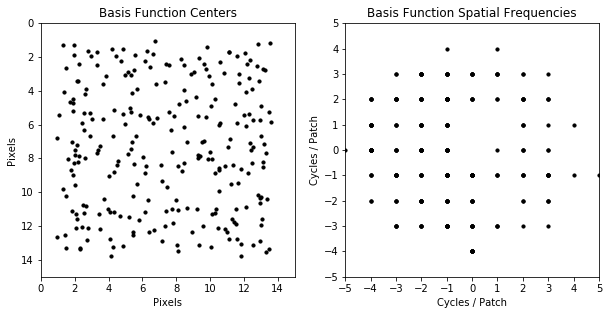

In [30]:
fig = pf.plot_loc_freq_summary(analyzer.bf_stats)
fig.savefig(analyzer.analysis_out_dir+"fig_location_frequency_centers.png")

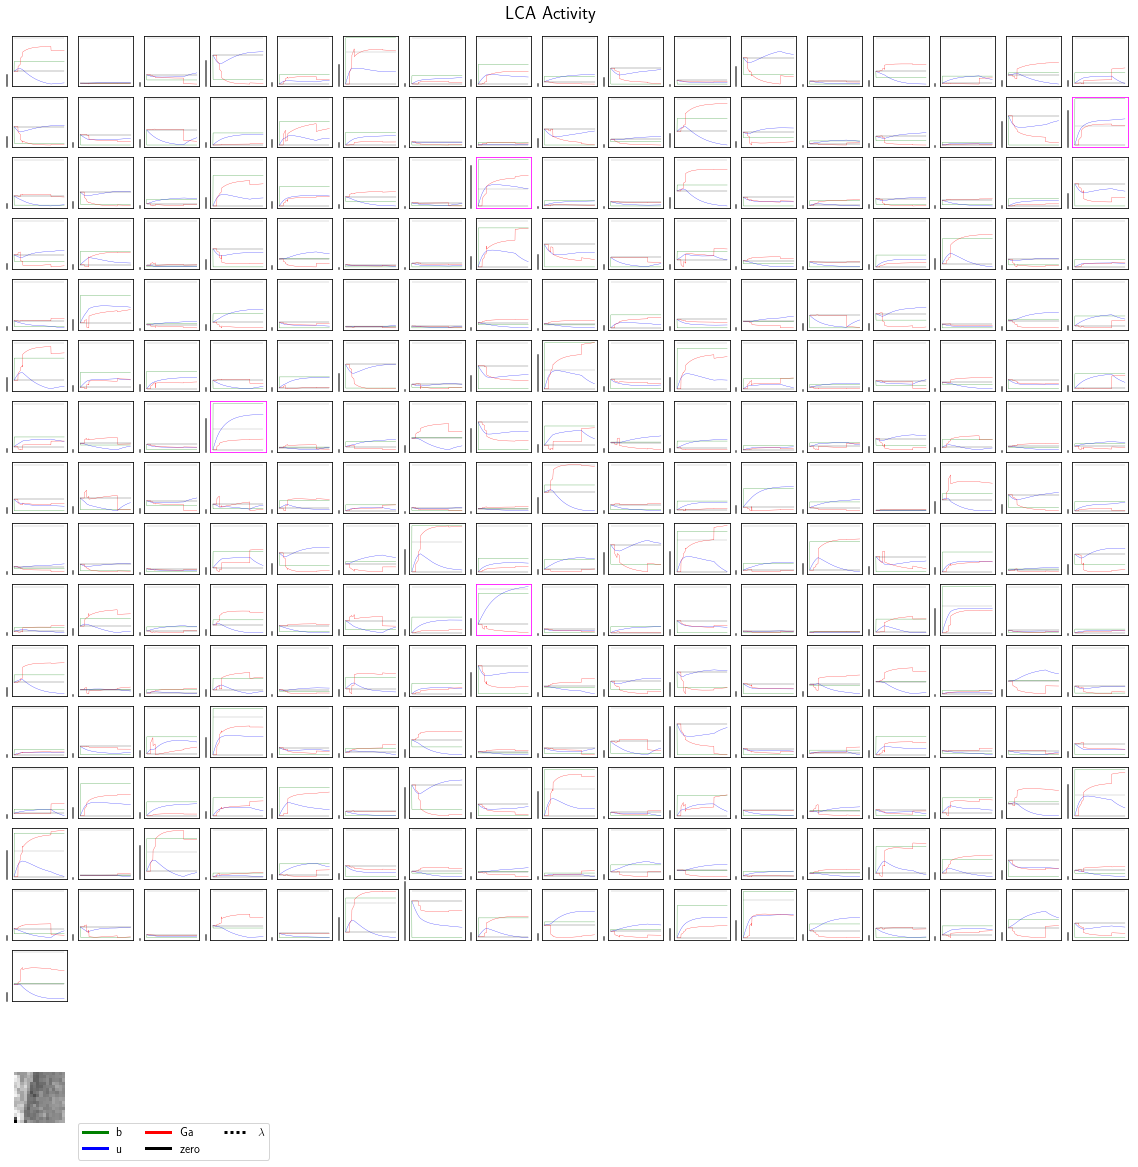

In [31]:
inf_trace_fig = pf.plot_inference_traces(analyzer.inference_stats, analyzer.model_schedule[0]["sparse_mult"])
inf_trace_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_inference_traces.pdf")

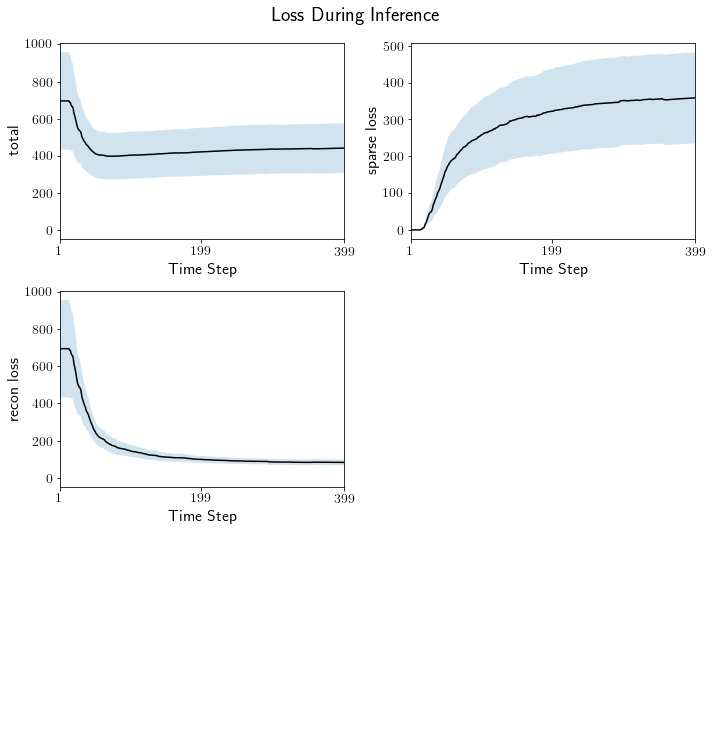

In [32]:
inf_stats_fig = pf.plot_inference_stats(analyzer.inference_stats, title="Loss During Inference")
inf_stats_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_inference_loss.png")

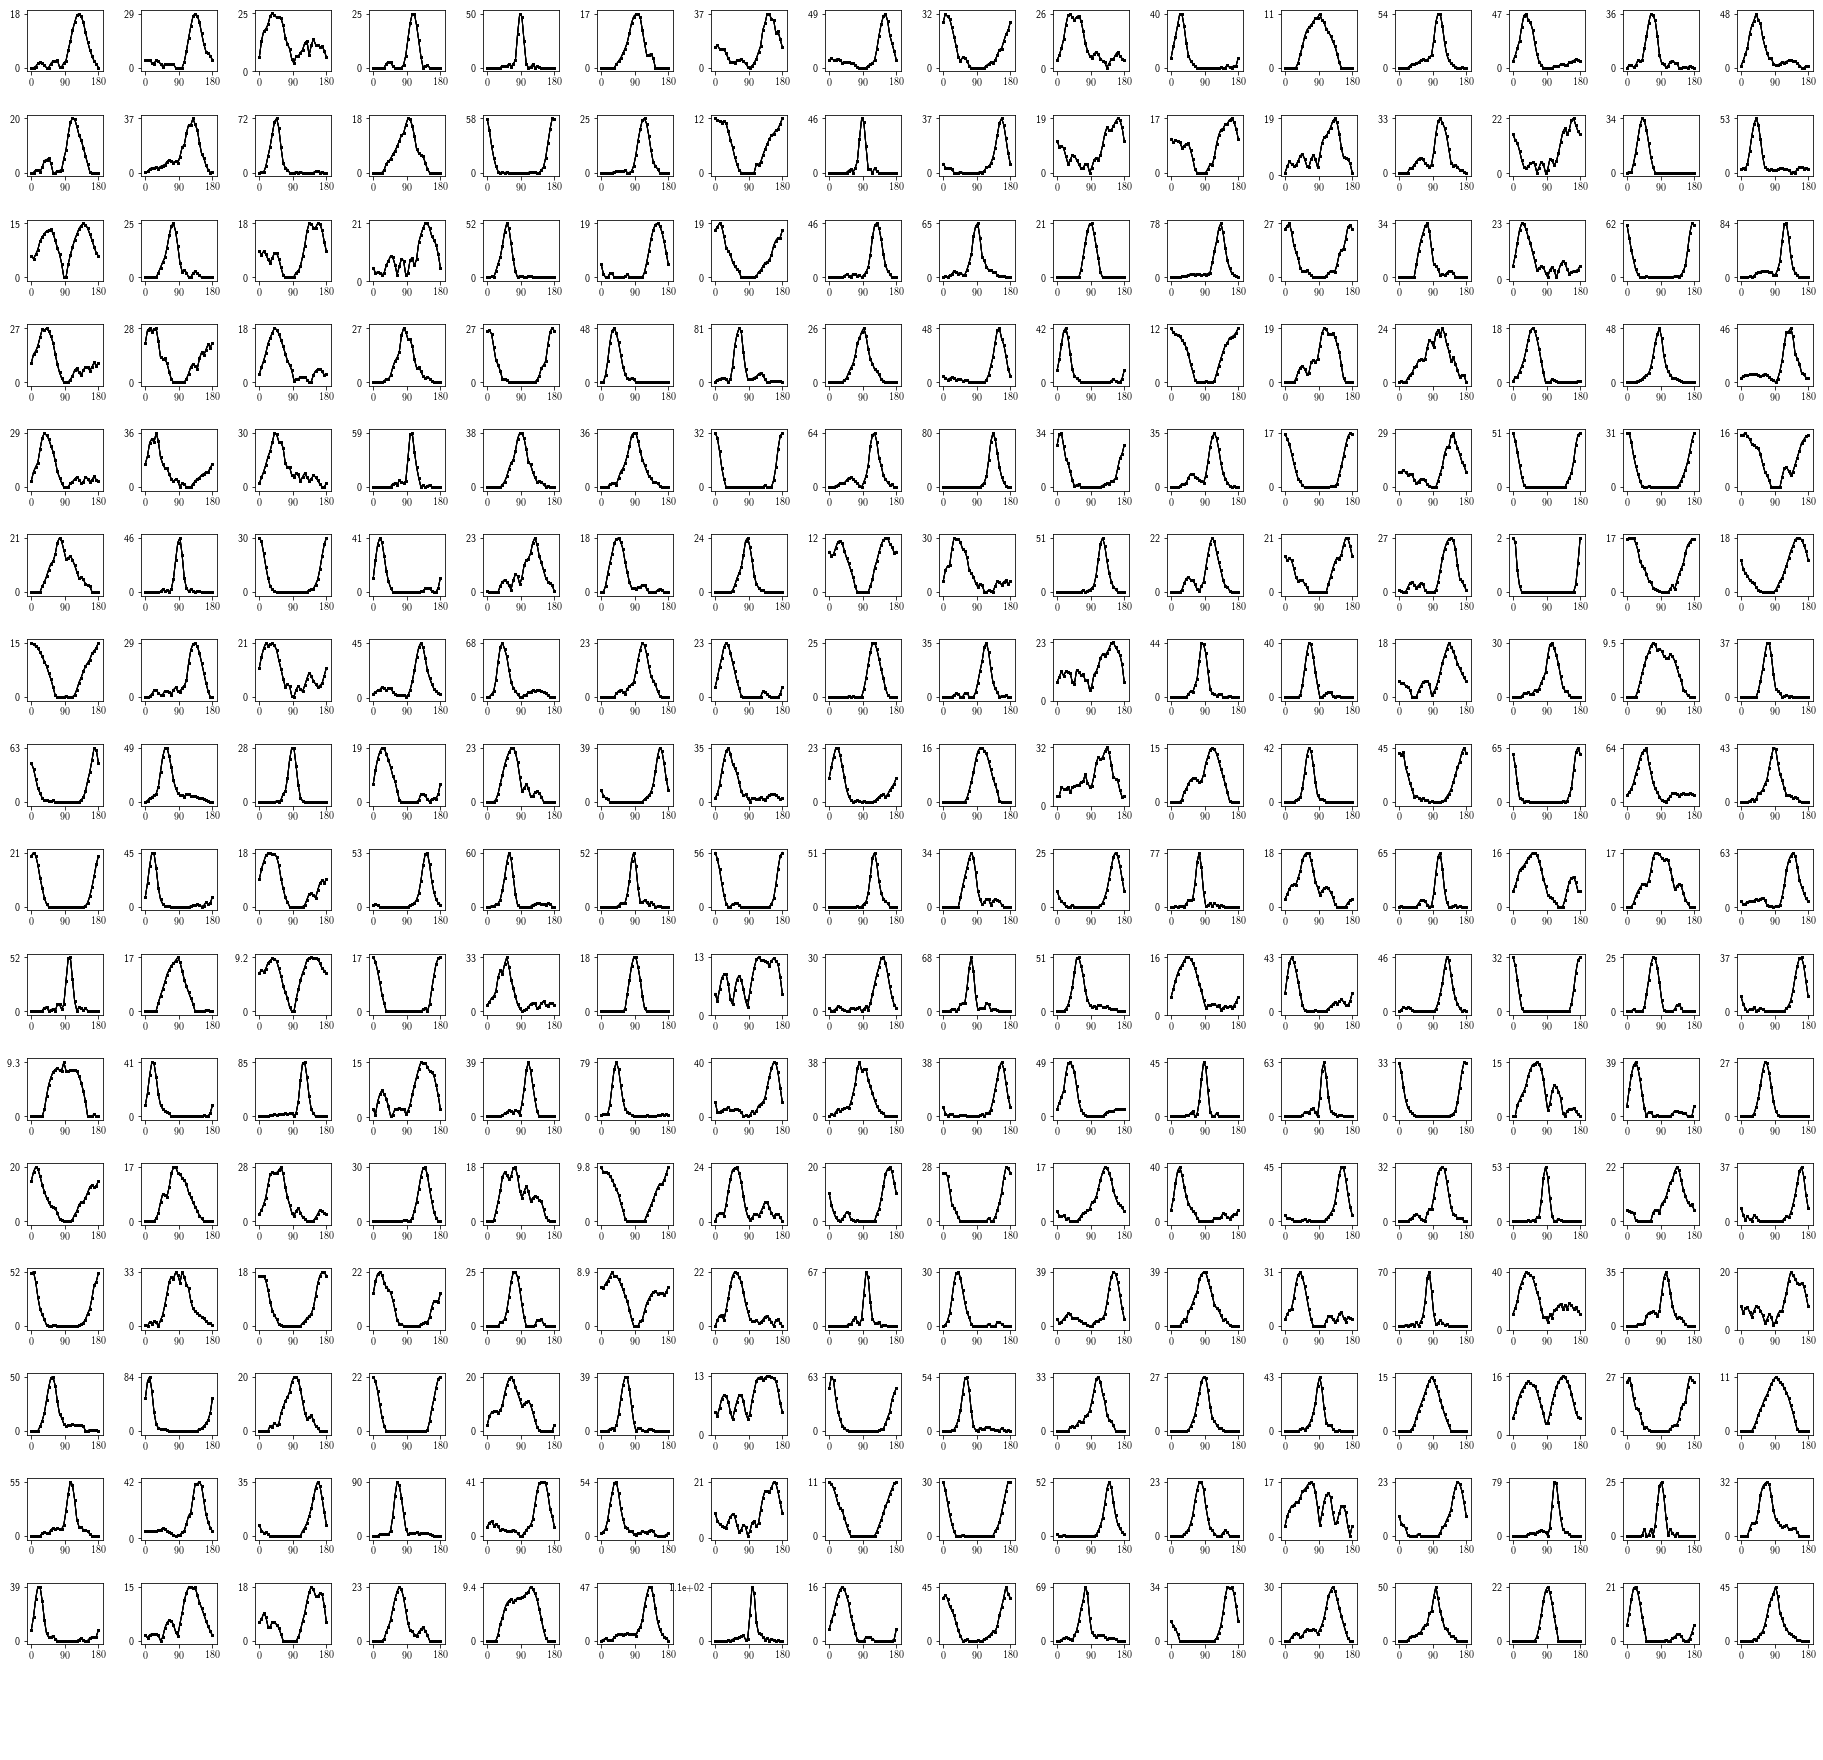

In [33]:
ot_fig = pf.plot_contrast_orientation_tuning(ot_bf_indices, ot_contrasts, ot_orientations, ot_mean_activations)
ot_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_orientation_tuning.pdf")

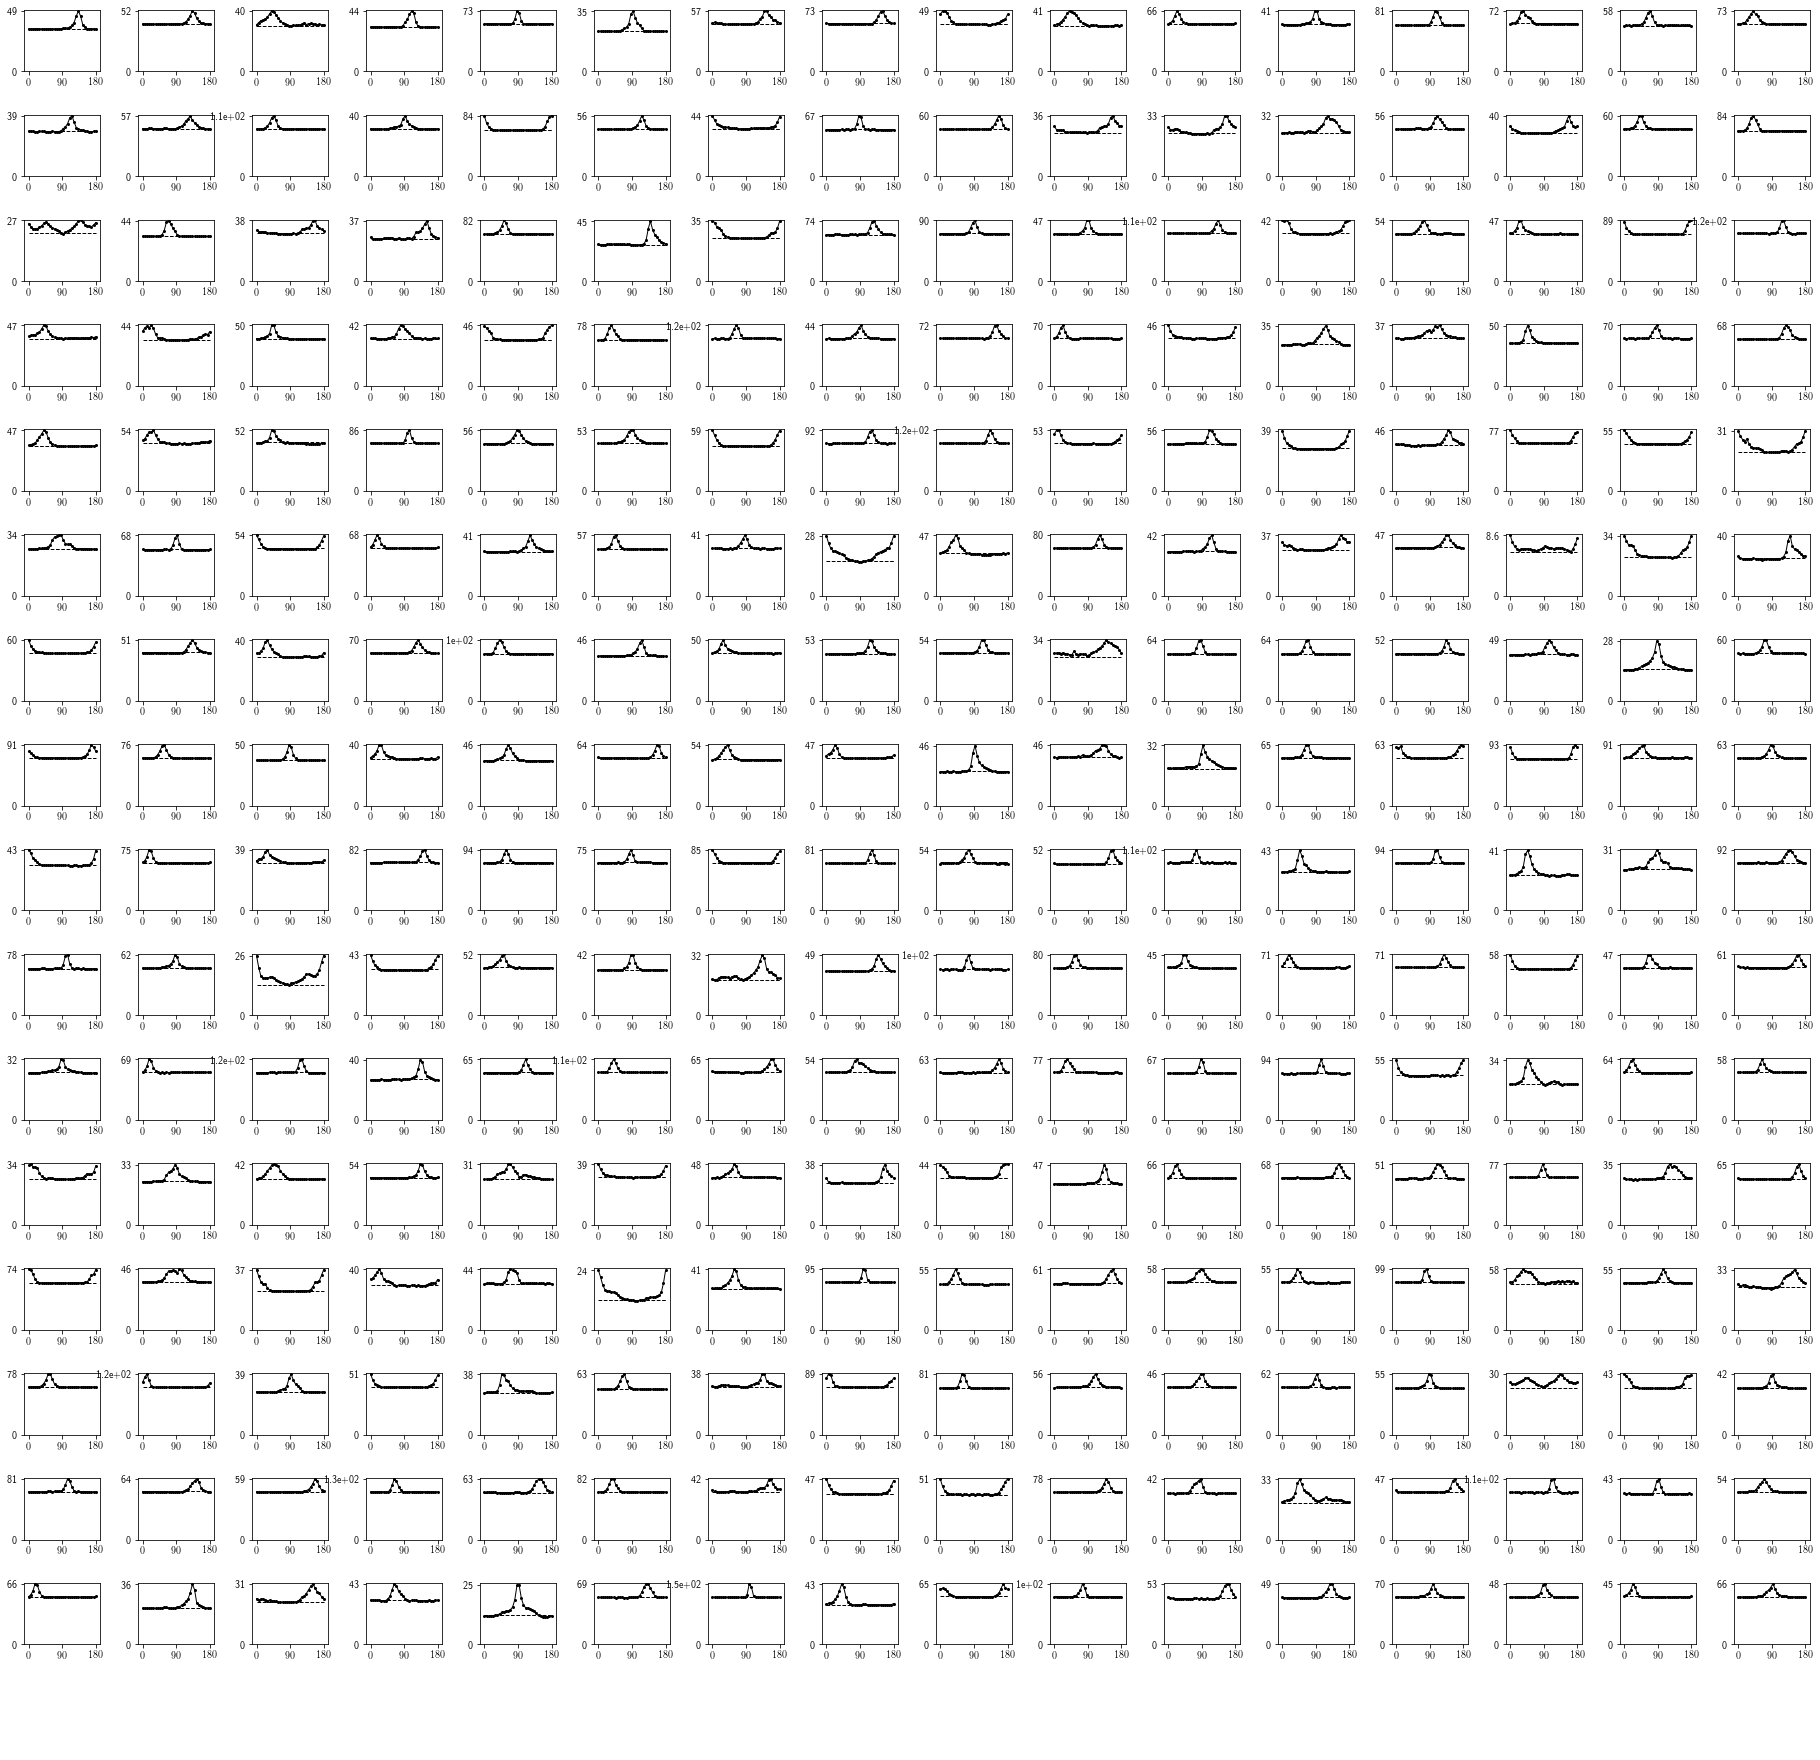

In [34]:
cross_fig = pf.plot_masked_orientation_tuning(co_bf_indices, co_mask_orientations, co_base_mean_responses, co_test_mean_responses)
cross_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_cross_orientation_tuning.pdf")

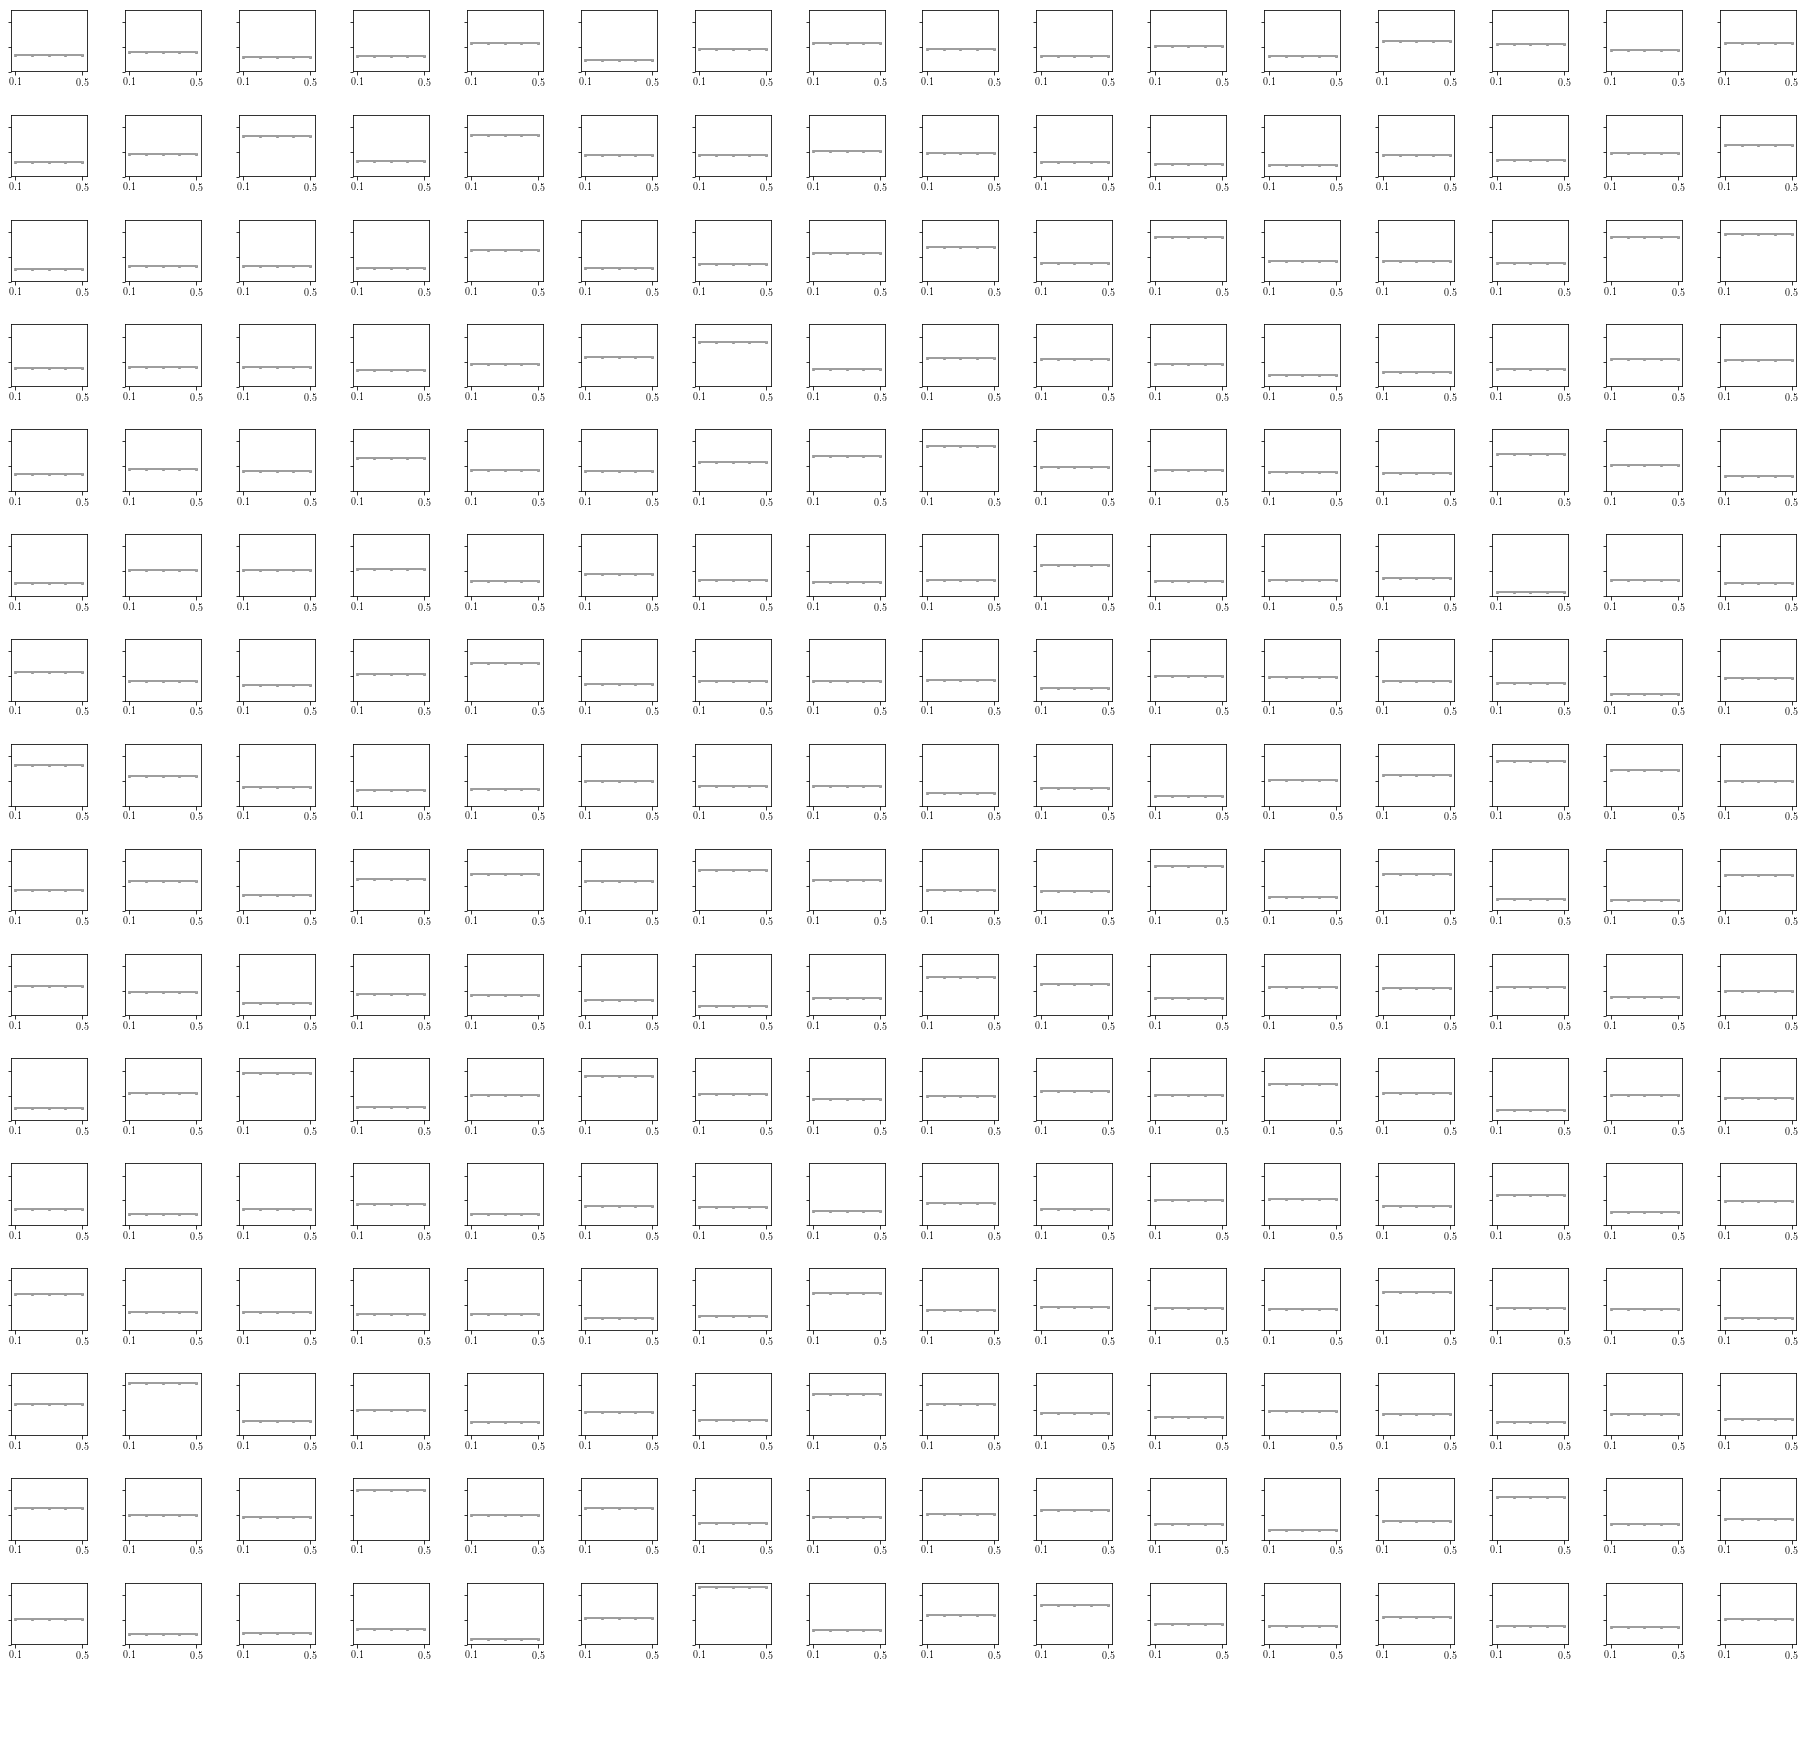

In [35]:
cross_contrast_fig = pf.plot_plaid_contrast_tuning(co_bf_indices, co_contrasts, co_contrasts, co_base_orientations,
  co_mask_orientations, co_test_mean_responses)
cross_contrast_fig.savefig(analyzer.analysis_out_dir+analysis_params["model_name"]+"_cross_contrast_orientation_tuning.pdf")

In [ ]:
#grating = lambda bf_idx,orientation,phase,contrast:dp.generate_grating(
#  *dp.get_grating_params(bf_stats=analyzer.bf_stats, bf_idx=bf_idx, orientation=orientation,
#  phase=phase, contrast=contrast, diameter=-1)).reshape(16,16)
#
#bf_idx = 29
#bf = analyzer.evals["weights/phi:0"].T[co_bf_indices[bf_idx],:].reshape(16,16)
#base_stim = grating(co_bf_indices[bf_idx], co_base_orientations[bf_idx], co_phases[0], 0.5)
#mask_stim = grating(co_bf_indices[bf_idx], orthogonal_orientations[bf_idx], co_phases[5], 0.5)
#test_stim = base_stim + mask_stim
#
#all_min = np.min(np.stack([base_stim, mask_stim, test_stim]))
#all_max = np.max(np.stack([base_stim, mask_stim, test_stim]))
#
#fig, axes = plt.subplots(4)
#axes[0] = pf.clear_axis(axes[0])
#axes[1] = pf.clear_axis(axes[1])
#axes[2] = pf.clear_axis(axes[2])
#axes[3] = pf.clear_axis(axes[3])
#axes[0].imshow(bf, cmap="Greys_r")
#axes[1].imshow(base_stim, cmap="Greys_r", vmin=all_min, vmax=all_max)
#axes[2].imshow(mask_stim, cmap="Greys_r", vmin=all_min, vmax=all_max)
#axes[3].imshow(test_stim, cmap="Greys_r", vmin=all_min, vmax=all_max)
#plt.show()
#fig.savefig("/home/dpaiton/tmp_figs/"+analysis_params["model_name"]+"_ex_cross_stim.png")

In [ ]:
#constructed_bfs = np.zeros_like(analyzer.evals["weights/phi:0"].T)
#for bf_idx in range(constructed_bfs.shape[0]):
#  params = dp.get_grating_params(analyzer.bf_stats, bf_idx)
#  grating = dp.generate_grating(*params)
#  constructed_bfs[bf_idx,...] = grating.reshape(256)
#fig = pf.plot_data_tiled(constructed_bfs)

Finding stimulus that produces equal response for non-preferred orientation by varying contrast

In [44]:
ot_bf_indices = analyzer.ot_grating_responses["neuron_indices"]
ot_contrasts = analyzer.ot_grating_responses["contrasts"]
ot_phases = analyzer.ot_grating_responses["phases"]
ot_orientations = analyzer.ot_grating_responses["orientations"]
ot_best_phases = analyzer.ot_grating_responses["best_phases"]
ot_mean_activations = analyzer.ot_grating_responses["mean_responses"]

best_orientation_idx = np.argmax(ot_mean_activations[1,-1,:])
print(best_orientation_idx)
print(ot_mean_activations.shape) # neurons x contrasts x orientations
print(ot_mean_activations[1, :, best_orientation_idx])
print("\n".join([str(idx)+"\t"+str(ot_mean_activations[1, 2, idx]) for idx in range(32)]))

23
(256, 5, 32)
[ 6.3731041  12.28753757 17.94241142 23.33721352 28.55110359]
0	2.0083911418914795
1	2.1920230388641357
2	3.20076847076416
3	1.7466799020767212
4	0.8571144938468933
5	1.6322959661483765
6	2.0643985271453857
7	0.0
8	0.0
9	0.0
10	0.21260744333267212
11	0.5607331395149231
12	0.8770689964294434
13	0.0
14	0.0
15	0.0
16	0.0
17	0.0
18	0.0
19	3.921675443649292
20	8.909631729125977
21	13.041496276855469
22	16.23339080810547
23	17.942411422729492
24	16.976720809936523
25	14.641766548156738
26	11.388233184814453
27	7.552621841430664
28	4.4765496253967285
29	4.932540416717529
30	4.1506428718566895
31	2.0083909034729004
